In [1]:
import pandas as pd
import numpy as np
import pickle
from os import path
import re
import nltk
import gensim
import time
import matplotlib.pyplot as plt

In [2]:
with open(path.expanduser('../../datasets/ted_talks.txt'), "r") as f:
    talk_pre = f.readlines()

In [3]:
len(talk_pre)

51898

In [4]:
data_words = [x.split() for x in talk_pre]

id2word = gensim.corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

In [13]:
np.mean([len(d) for d in data_words])

40.34313461019693

In [5]:
token_tf = [(id2word[token_id],freq) for token_id, freq in id2word.cfs.items()]
token_tf.sort(key=lambda x: x[1], reverse = True)
_, tf = zip(*token_tf)

In [6]:
token_df = [(id2word[token_id],freq) for token_id, freq in id2word.dfs.items()]
token_df.sort(key=lambda x: x[1], reverse = True)
_, df = zip(*token_df)

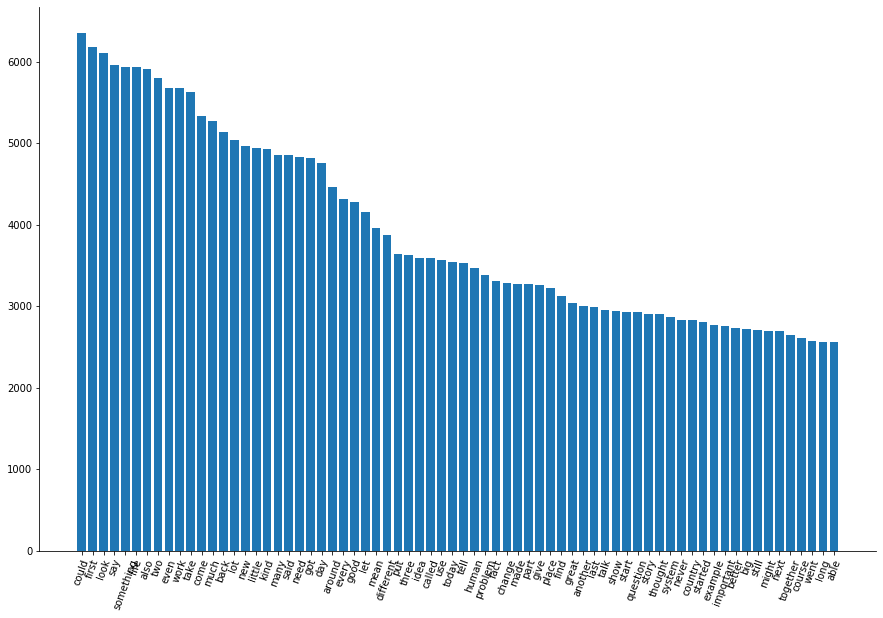

In [7]:
fig, ax = plt.subplots(figsize = (15,10))

plt.bar(*zip(*token_df[:70]))
# plt.axhline(y=np.percentile(df,90), color='r', linestyle='-')
# plt.axhline(y=np.percentile(df,50), color='y', linestyle='-')


# ax.set_title("Term Document Frequency")
ax.tick_params(axis='x', rotation=70)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.show()
plt.savefig('ted_word_distribution.pdf')  

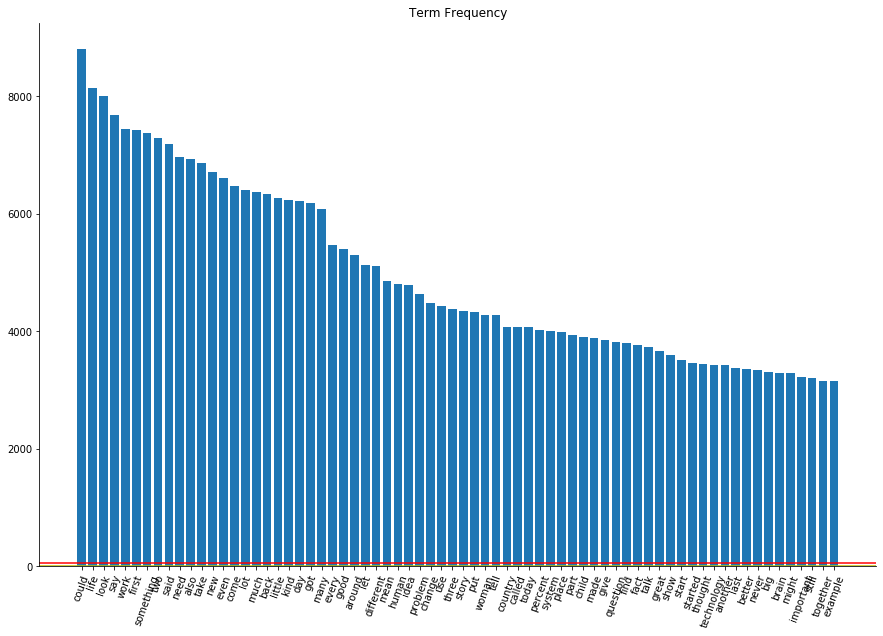

In [8]:
fig, ax = plt.subplots(figsize = (15,10))

plt.bar(*zip(*token_tf[:70]))
plt.axhline(y=np.percentile(tf,90), color='r', linestyle='-')
plt.axhline(y=np.percentile(tf,50), color='y', linestyle='-')

ax.set_title("Term Frequency")
ax.tick_params(axis='x', rotation=70)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()